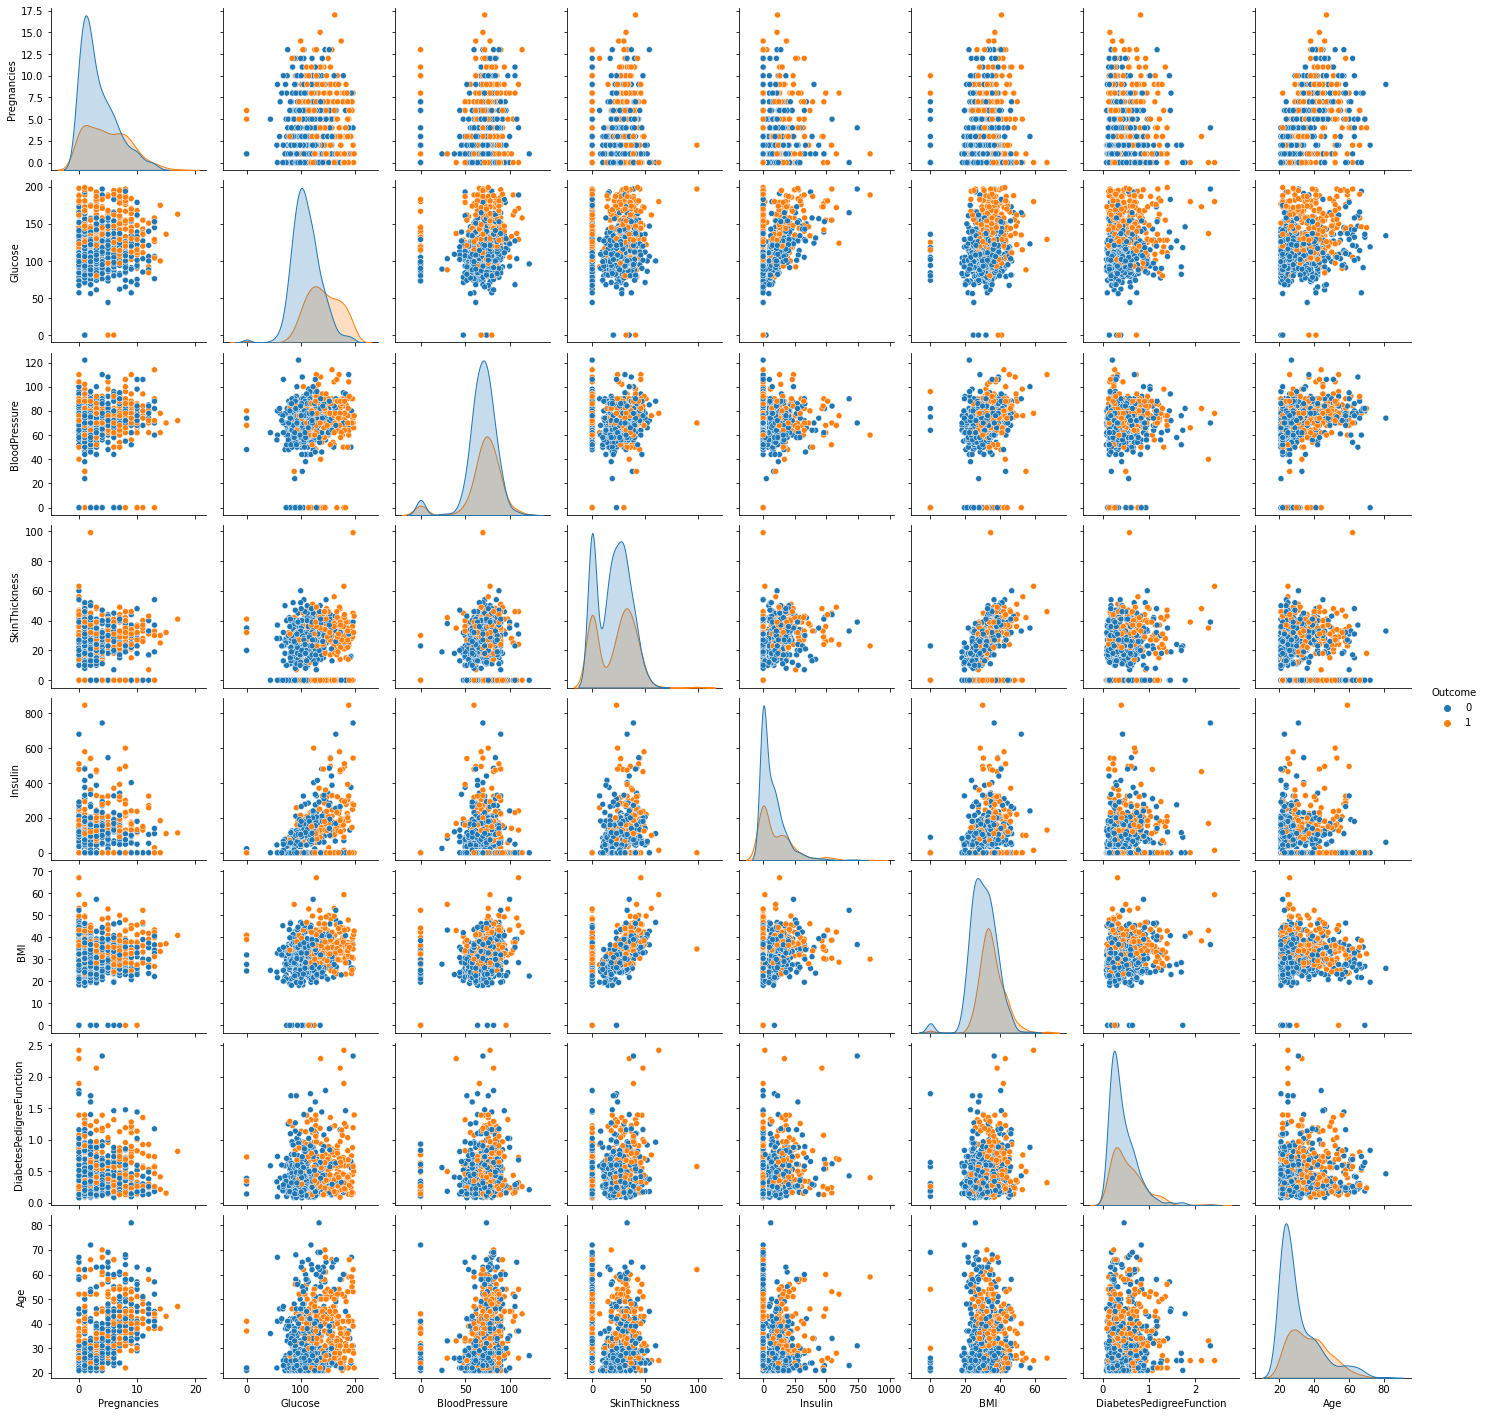

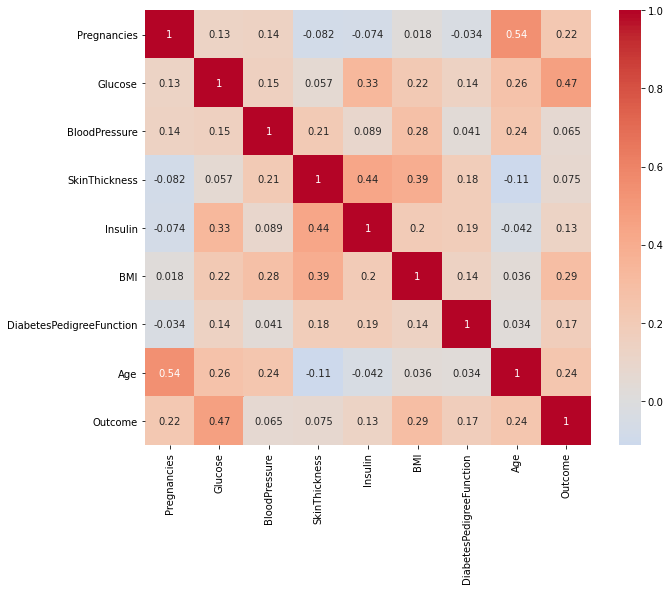

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, plot_confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import itertools

# Load dataset
data = pd.read_csv("diabetes.csv")

# Plot the distribution of the features
sns.pairplot(data, hue='Outcome')
plt.show()

# Visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()



In [2]:
# Split data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [3]:
# Define a function to evaluate and display metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} Model Metrics:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1-score: {f1:.2%}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\n")


In [4]:
# Train and evaluate models
# ANN
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=8))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_ann = (model.predict(X_test) > 0.5).astype('int32')

# Calculate accuracy
ann_accuracy = accuracy_score(y_test, y_pred_ann)



# Decision Tree
# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# SVM
# Train the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)



Epoch 1/150
14/14 [==============================] - 1s 14ms/step - loss: 1.0039 - accuracy: 0.2960 - val_loss: 0.8916 - val_accuracy: 0.3889
Epoch 2/150
14/14 [==============================] - 0s 3ms/step - loss: 0.9626 - accuracy: 0.2960 - val_loss: 0.8623 - val_accuracy: 0.3889
Epoch 3/150
14/14 [==============================] - 0s 4ms/step - loss: 0.9253 - accuracy: 0.3054 - val_loss: 0.8352 - val_accuracy: 0.3981
Epoch 4/150
14/14 [==============================] - 0s 4ms/step - loss: 0.8904 - accuracy: 0.3124 - val_loss: 0.8105 - val_accuracy: 0.4167
Epoch 5/150
14/14 [==============================] - 0s 3ms/step - loss: 0.8600 - accuracy: 0.3333 - val_loss: 0.7870 - val_accuracy: 0.4352
Epoch 6/150
14/14 [==============================] - 0s 3ms/step - loss: 0.8310 - accuracy: 0.3333 - val_loss: 0.7661 - val_accuracy: 0.4444
Epoch 7/150
14/14 [==============================] - 0s 3ms/step - loss: 0.8053 - accuracy: 0.3520 - val_loss: 0.7472 - val_accuracy: 0.4352
Epoch 8/150


Epoch 59/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7786 - val_loss: 0.4874 - val_accuracy: 0.7593
Epoch 60/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7809 - val_loss: 0.4875 - val_accuracy: 0.7593
Epoch 61/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7832 - val_loss: 0.4873 - val_accuracy: 0.7593
Epoch 62/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.7786 - val_loss: 0.4881 - val_accuracy: 0.7593
Epoch 63/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7832 - val_loss: 0.4879 - val_accuracy: 0.7593
Epoch 64/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7832 - val_loss: 0.4876 - val_accuracy: 0.7593
Epoch 65/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7832 - val_loss: 0.4878 - val_accuracy: 0.7593
Epoch 

14/14 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.7902 - val_loss: 0.4923 - val_accuracy: 0.7500
Epoch 117/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.7902 - val_loss: 0.4919 - val_accuracy: 0.7500
Epoch 118/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.7902 - val_loss: 0.4920 - val_accuracy: 0.7407
Epoch 119/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.7902 - val_loss: 0.4920 - val_accuracy: 0.7500
Epoch 120/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.7949 - val_loss: 0.4926 - val_accuracy: 0.7500
Epoch 121/150
14/14 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.7949 - val_loss: 0.4927 - val_accuracy: 0.7500
Epoch 122/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.7949 - val_loss: 0.4921 - val_accuracy: 0.7500
Epoch 123/150

In [5]:
# Print results
evaluate_model(y_test, y_pred_ann, "ANN")
# Print results
evaluate_model(y_test, y_pred_dt, "Decision Tree")
# Print results
evaluate_model(y_test, y_pred_svm, "SVM")

ANN Model Metrics:
Accuracy: 74.46%
Precision: 63.64%
Recall: 61.25%
F1-score: 62.42%

Confusion Matrix:
 [[123  28]
 [ 31  49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



Decision Tree Model Metrics:
Accuracy: 70.56%
Precision: 56.00%
Recall: 70.00%
F1-score: 62.22%

Confusion Matrix:
 [[107  44]
 [ 24  56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       151
           1       0.56      0.70      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



SVM Model Metrics:
Accur

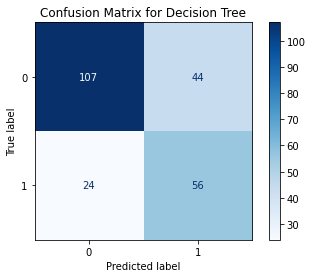

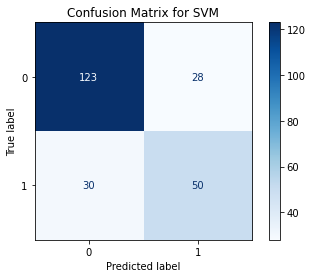

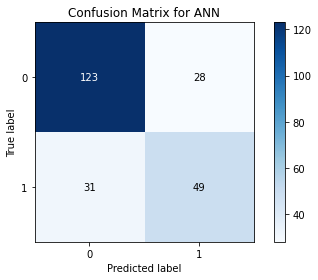

In [6]:
def plot_ann_confusion_matrix(y_true, y_pred, model_name, cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=f'Confusion Matrix for {model_name}',
           ylabel='True label',
           xlabel='Predicted label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Confusion matrices for each model
models = [dt_classifier, svm_classifier, model]
model_names = ['Decision Tree', 'SVM', 'ANN']

for model, model_name in zip(models[:-1], model_names[:-1]):
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# For ANN model
plot_ann_confusion_matrix(y_test, y_pred_ann, model_names[-1], cmap='Blues')

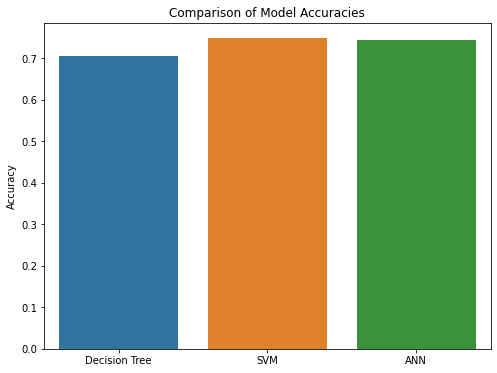

In [7]:
# Bar chart comparing the accuracy of the three models
model_names = ['Decision Tree', 'SVM', 'ANN']
accuracies = [dt_accuracy, svm_accuracy, ann_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

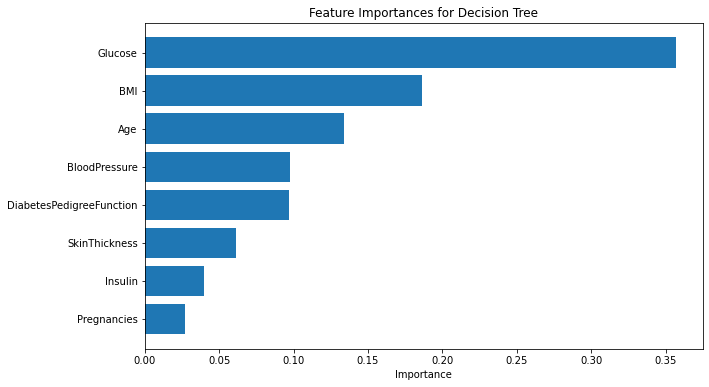

In [8]:
# Get feature importances from the Decision Tree model
importances = dt_classifier.feature_importances_

# Sort the features by importance
sorted_idx = np.argsort(importances)

feature_names = data.columns[:-1]  # Assuming the last column is 'Outcome'


# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for Decision Tree')
plt.show()



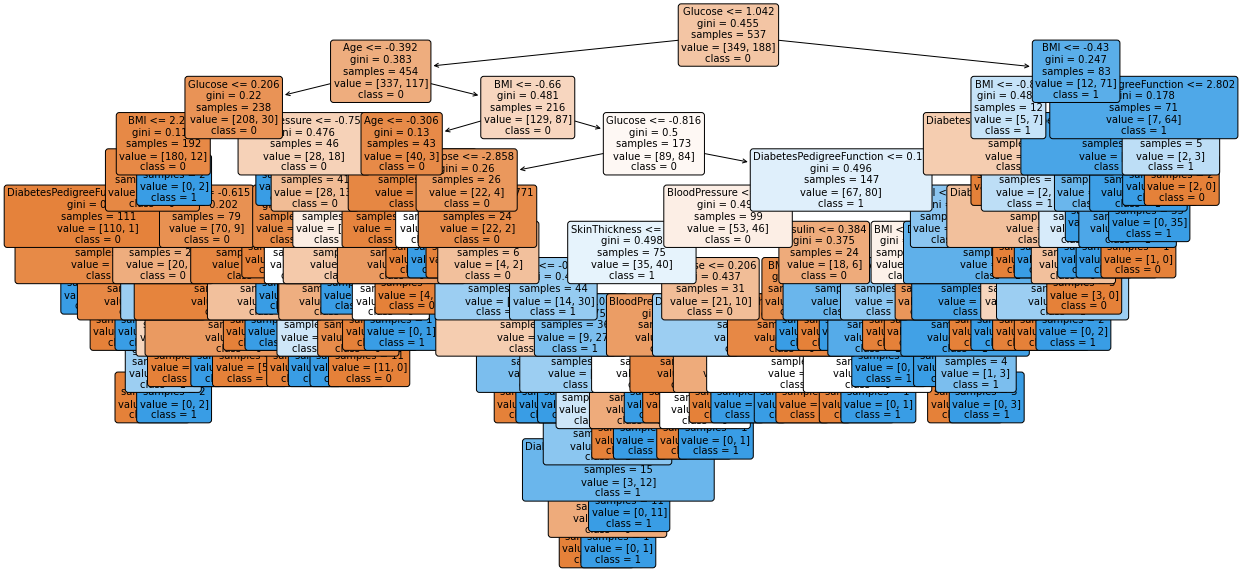

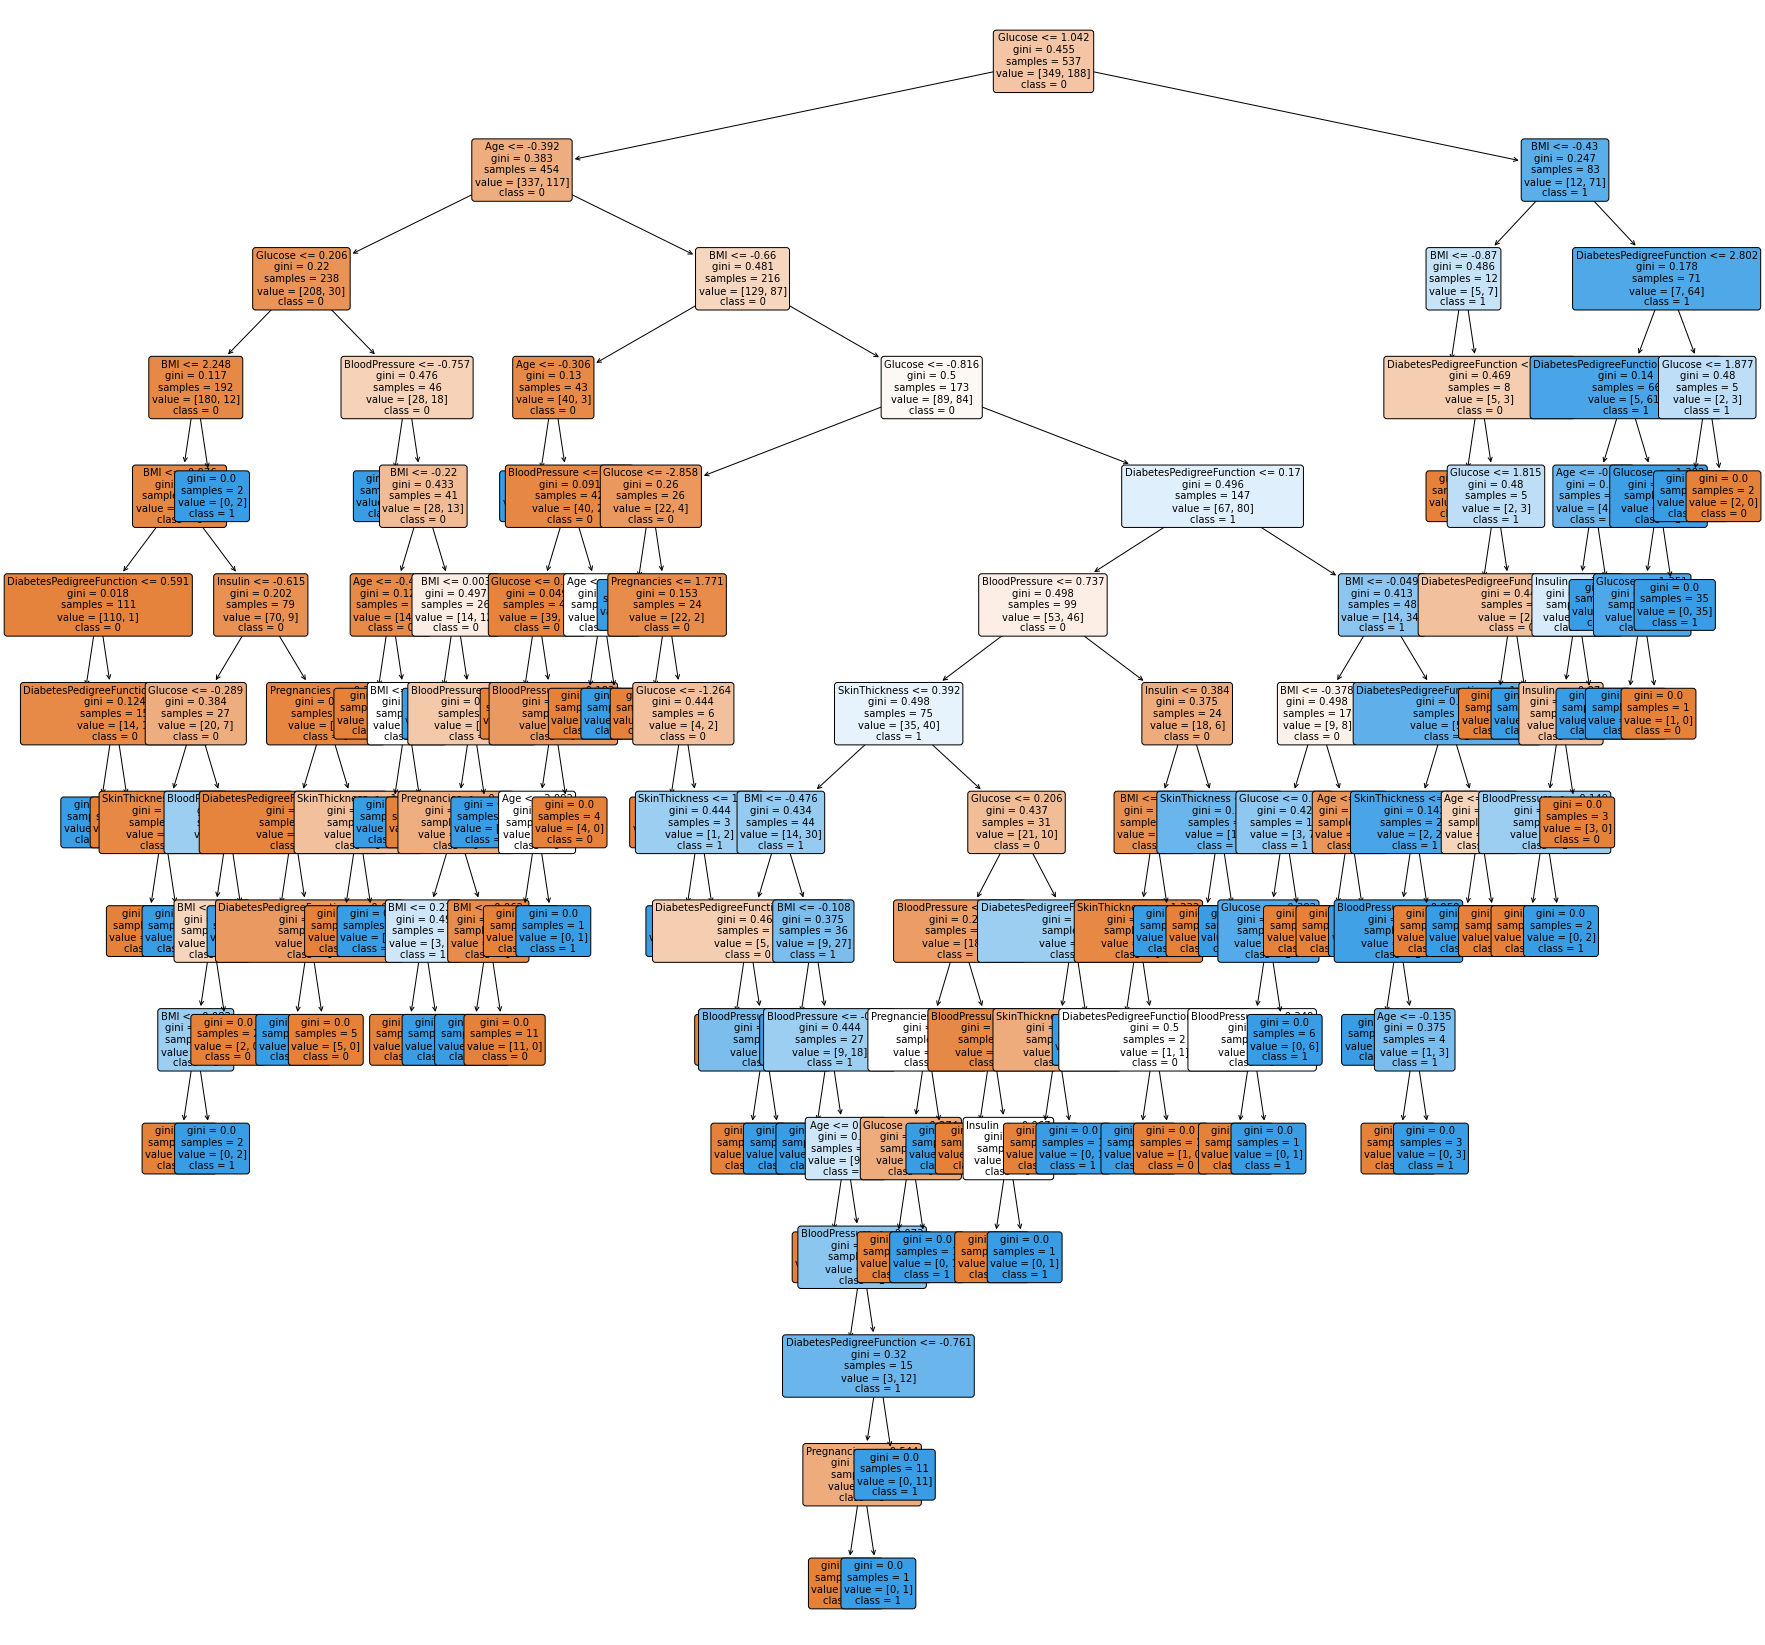

In [9]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()

plt.figure(figsize=(30, 30))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()

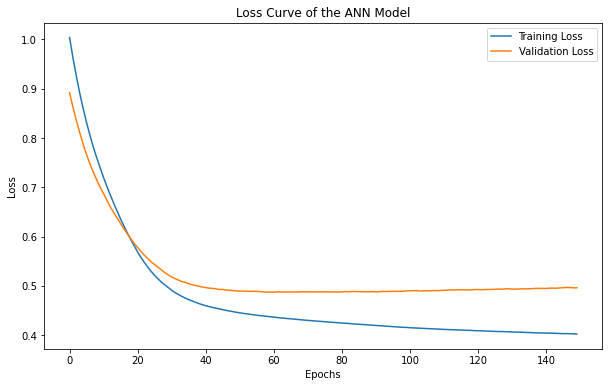

In [10]:
# Plot the training and validation loss of the ann model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve of the ANN Model')
plt.legend()
plt.show()



In [11]:
# Optimization 

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

ann_clf = MLPClassifier(random_state=42)


param_dist = {'hidden_layer_sizes': [(64,), (128,), (64, 64)],
              'activation': ['relu', 'tanh'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate_init': [0.001, 0.01]}

random_search = RandomizedSearchCV(ann_clf, param_dist, scoring='accuracy', cv=5, n_iter=20, random_state=42)
random_search.fit(X_train, y_train)

best_ann = random_search.best_estimator_
best_ann_params = random_search.best_params_
ann_accuracy_opt = accuracy_score(y_test, best_ann.predict(X_test))

print(f"Best ANN parameters: {best_ann_params}")
print(f"ANN Model Accuracy (with optimized parameters): {ann_accuracy_opt:.2%}")




Best ANN parameters: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (128,), 'alpha': 0.001, 'activation': 'tanh'}
ANN Model Accuracy (with optimized parameters): 74.89%


In [13]:
from sklearn.metrics import accuracy_score

max_depth_values = [3, 4, 5]
min_samples_leaf_values = [2]

best_accuracy = 0
best_depth = 0
best_min_samples_leaf = 0

for depth in max_depth_values:
    for min_samples in min_samples_leaf_values:
        dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples, random_state=42)
        dt_clf.fit(X_train, y_train)
        y_pred = dt_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"max_depth: {depth}, min_samples_leaf: {min_samples}, accuracy: {accuracy:.2%}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_min_samples_leaf = min_samples

print(f"Best parameters: max_depth = {best_depth}, min_samples_leaf = {best_min_samples_leaf}")

# Balancing dataset
balanced_data = data.groupby('Outcome').apply(lambda x: x.sample(n=data['Outcome'].value_counts().min(), random_state=42)).reset_index(drop=True)

X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_balanced = pd.DataFrame(scaler.fit_transform(X_train_balanced), columns=X_train_balanced.columns)
X_test_balanced = pd.DataFrame(scaler.transform(X_test_balanced), columns=X_test_balanced.columns)

# Fit the model with the balanced dataset and best parameters found earlier
dt_clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, random_state=42)
dt_clf.fit(X_train_balanced, y_train_balanced)

# Calculate the accuracy
y_pred_balanced = dt_clf.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
dt_accuracy_opt = best_accuracy

print(f"Balanced dataset accuracy: {accuracy_balanced:.2%}")
print(f"Best: {dt_accuracy_opt:.2%}")


max_depth: 3, min_samples_leaf: 2, accuracy: 71.86%
max_depth: 4, min_samples_leaf: 2, accuracy: 71.86%
max_depth: 5, min_samples_leaf: 2, accuracy: 75.76%
Best parameters: max_depth = 5, min_samples_leaf = 2
Balanced dataset accuracy: 68.32%
Best: 75.76%


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_dist = {'max_depth': [3, 4, 5],
              'min_samples_leaf': [2]}

dt_clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(dt_clf, param_distributions=param_dist, n_iter=3, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_dt = random_search.best_estimator_
best_dt_params = random_search.best_params_
dt_accuracy_opt = accuracy_score(y_test, best_dt.predict(X_test))

print(f"Best Decision Tree parameters found from randomized search cv: {best_dt_params}")
print(f"Decision Tree Model Accuracy (with optimized parameters in randomized search): {dt_accuracy_opt:.2%}")



Best Decision Tree parameters found from randomized search cv: {'min_samples_leaf': 2, 'max_depth': 4}
Decision Tree Model Accuracy (with optimized parameters in randomized search): 71.86%


In [15]:
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=42)

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
best_svm_params = grid_search.best_params_
svm_accuracy_opt = accuracy_score(y_test, best_svm.predict(X_test))

print(f"Best SVM parameters: {best_svm_params}")
print(f"SVM Model Accuracy (with optimized parameters): {svm_accuracy_opt:.2%}")


Best SVM parameters: {'C': 1, 'gamma': 0.01}
SVM Model Accuracy (with optimized parameters): 75.32%


In [16]:
# New Trained Models

In [17]:
# New Decision Tree model with best parameters found
dt_best = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, random_state=42)

# New SVM model with best parameters found
svm_best = SVC(C=best_svm_params['C'], gamma=best_svm_params['gamma'], random_state=42)

# New ANN model with best parameters found
ann_best = MLPClassifier(hidden_layer_sizes=best_ann_params['hidden_layer_sizes'], activation=best_ann_params['activation'], alpha=best_ann_params['alpha'], learning_rate_init=best_ann_params['learning_rate_init'], random_state=42)


In [18]:
# Train the new models on the training data
dt_best.fit(X_train, y_train)
svm_best.fit(X_train, y_train)
ann_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt_best = dt_best.predict(X_test)
y_pred_svm_best = svm_best.predict(X_test)
y_pred_ann_best = ann_best.predict(X_test)


In [19]:
# Print results
evaluate_model(y_test, y_pred_ann_best, "ANN opt")
# Print results
evaluate_model(y_test, y_pred_dt_best, "Decision Tree opt")
# Print results
evaluate_model(y_test, y_pred_svm_best, "SVM op")

ANN opt Model Metrics:
Accuracy: 74.89%
Precision: 64.10%
Recall: 62.50%
F1-score: 63.29%

Confusion Matrix:
 [[123  28]
 [ 30  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



Decision Tree opt Model Metrics:
Accuracy: 75.76%
Precision: 68.75%
Recall: 55.00%
F1-score: 61.11%

Confusion Matrix:
 [[131  20]
 [ 36  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.55      0.61        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



SVM op Model Met

In [20]:
## Visualizing Optimizations

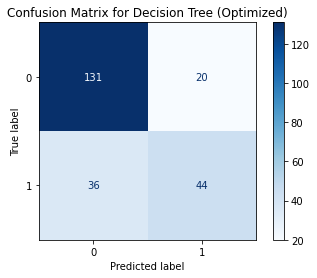

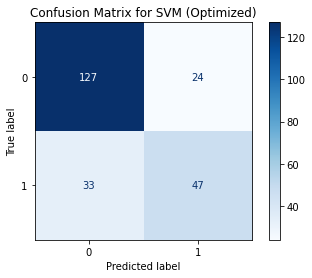

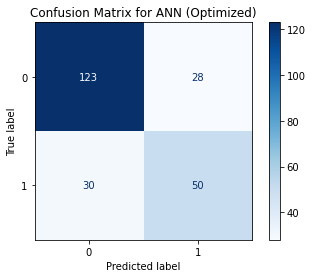

In [21]:
# Confusion matrices for each model
models_opt = [dt_best, svm_best, ann_best]
model_names_opt = ['Decision Tree (Optimized)', 'SVM (Optimized)', 'ANN (Optimized)']

for model, model_name in zip(models_opt, model_names_opt):
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

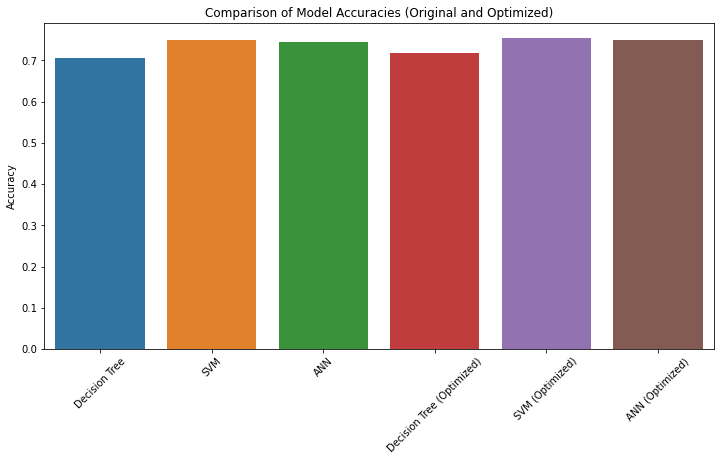

In [22]:
# Add optimized model names and accuracies to the lists
model_names = ['Decision Tree', 'SVM', 'ANN', 'Decision Tree (Optimized)', 'SVM (Optimized)', 'ANN (Optimized)']
accuracies = [dt_accuracy, svm_accuracy, ann_accuracy, dt_accuracy_opt, svm_accuracy_opt, ann_accuracy_opt]

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Original and Optimized)')
plt.xticks(rotation=45)
plt.show()


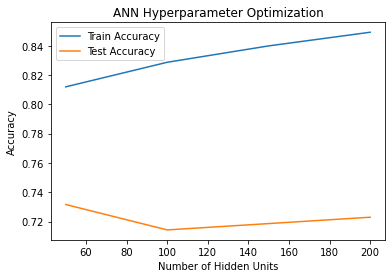

In [23]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(50,), (100,), (150,), (200,)]
train_accuracies = []
test_accuracies = []

for hidden_layer_size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=200, random_state=42)
    mlp.fit(X_train, y_train)
    
    train_accuracies.append(mlp.score(X_train, y_train))
    test_accuracies.append(mlp.score(X_test, y_test))

# Visualize the results in a line plot
plt.plot([50, 100, 150, 200], train_accuracies, label='Train Accuracy')
plt.plot([50, 100, 150, 200], test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('ANN Hyperparameter Optimization')
plt.legend()
plt.show()


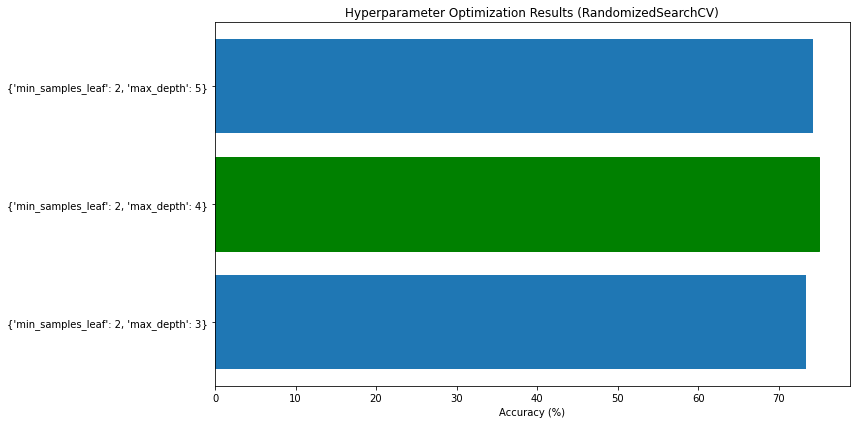

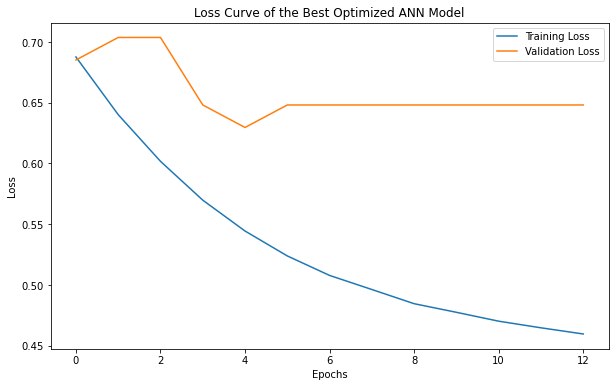

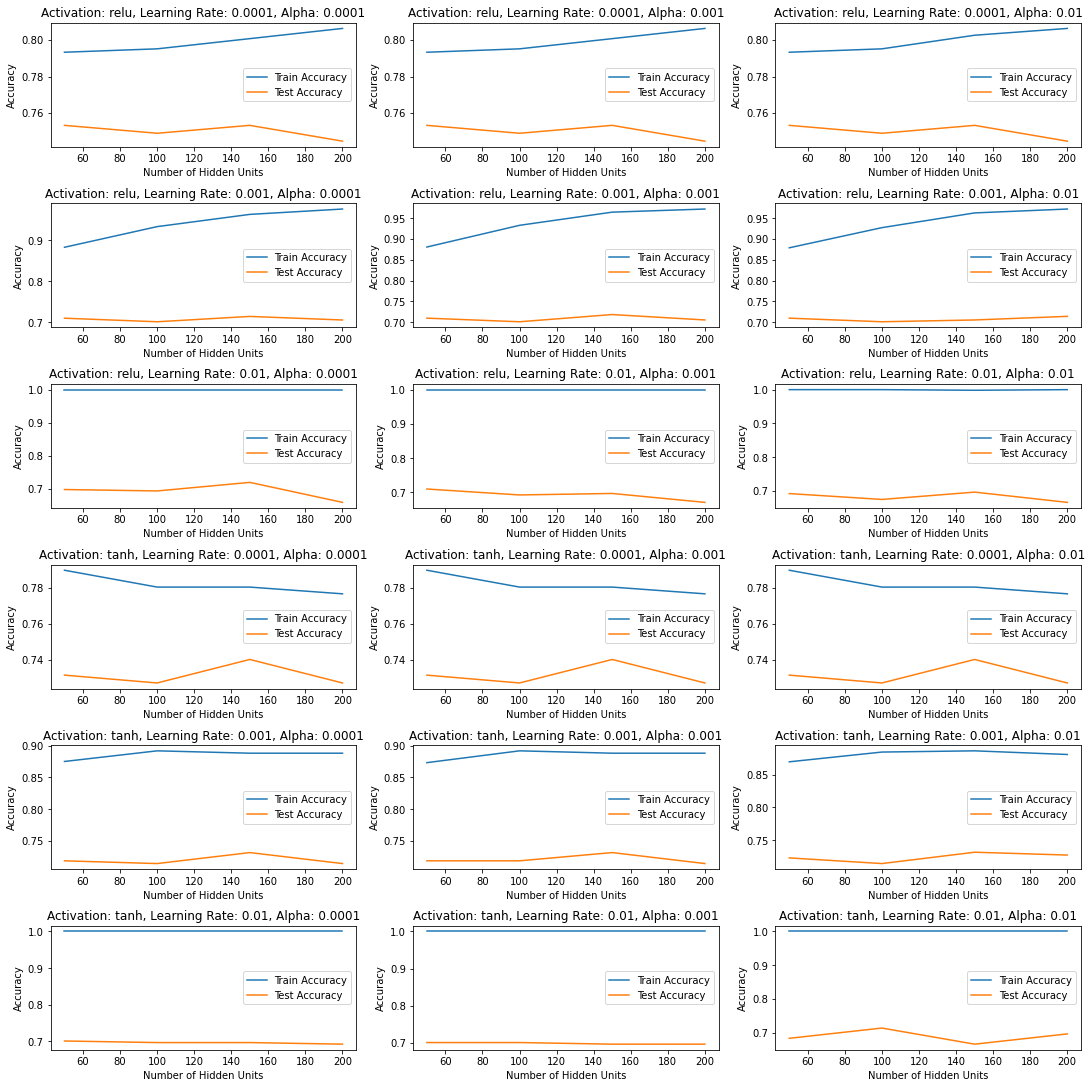

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get mean test scores and convert to percentages
mean_test_scores = random_search.cv_results_['mean_test_score'] * 100

# Get the index of the best hyperparameters
best_index = np.argmax(mean_test_scores)

# Get the combinations of hyperparameters
params_combinations = [str(params) for params in random_search.cv_results_['params']]

# Set up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot
bars = ax.barh(range(len(mean_test_scores)), mean_test_scores)

# Highlight the best combination of hyperparameters
bars[best_index].set_color('g')

# Add labels and title
ax.set_yticks(range(len(mean_test_scores)))
ax.set_yticklabels(params_combinations, fontsize=10)
ax.set_xlabel('Accuracy (%)')
ax.set_title('Hyperparameter Optimization Results (RandomizedSearchCV)')

# Display the plot
plt.tight_layout()
plt.show()





# Set early_stopping=True in the best_ann model
best_ann.set_params(early_stopping=True)
best_ann.fit(X_train, y_train)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(best_ann.loss_curve_, label='Training Loss')
plt.plot(best_ann.validation_scores_, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve of the Best Optimized ANN Model')
plt.legend()
plt.show()



hidden_layer_sizes = [(50,), (100,), (150,), (200,)]
activation_functions = ['relu', 'tanh']
learning_rates = [0.0001, 0.001, 0.01]
alphas = [0.0001, 0.001, 0.01]

results = []

for activation in activation_functions:
    for learning_rate in learning_rates:
        for alpha in alphas:
            train_accuracies = []
            test_accuracies = []

            for hidden_layer_size in hidden_layer_sizes:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=1000, random_state=42,
                    activation=activation, learning_rate_init=learning_rate, alpha=alpha, tol=1e-4)
                mlp.fit(X_train, y_train)

                train_accuracies.append(mlp.score(X_train, y_train))
                test_accuracies.append(mlp.score(X_test, y_test))

            results.append({'activation': activation, 'learning_rate': learning_rate, 'alpha': alpha,
                            'train_accuracies': train_accuracies, 'test_accuracies': test_accuracies})

            
fig, axs = plt.subplots(len(activation_functions) * len(learning_rates), len(alphas),
                        figsize=(15, 15), constrained_layout=True)

for i, result in enumerate(results):
    row = i // len(alphas)
    col = i % len(alphas)

    axs[row, col].plot([50, 100, 150, 200], result['train_accuracies'], label='Train Accuracy')
    axs[row, col].plot([50, 100, 150, 200], result['test_accuracies'], label='Test Accuracy')
    axs[row, col].set_title(f"Activation: {result['activation']}, Learning Rate: {result['learning_rate']}, Alpha: {result['alpha']}")
    axs[row, col].set_xlabel('Number of Hidden Units')
    axs[row, col].set_ylabel('Accuracy')
    axs[row, col].legend()

plt.show()

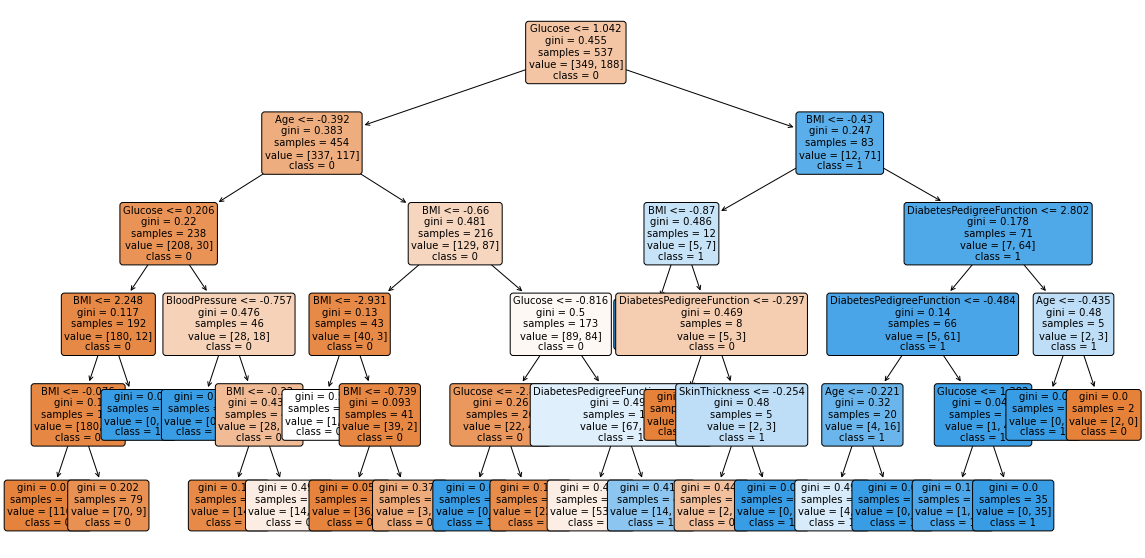

In [25]:
# Fit the model with the best parameters
best_dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)
best_dt_clf.fit(X_train, y_train)

# Pruned Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()


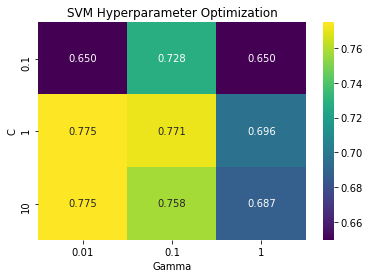

In [26]:
# Visualize the results in a heatmap
scores = grid_search.cv_results_['mean_test_score'].reshape(3, 3)
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('SVM Hyperparameter Optimization')
plt.show()
